## Question 1
**Regularization** Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You must python.

In [1]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import data
df = pd. read_csv("https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv")

In [2]:
df = df.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis = 1) # remove unused the columns
df=df.dropna(subset=['Salary']) # remove the empty values
df.head(4)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [3]:
# setup target value and features
y = df.Salary
X = df.drop(['Salary'], axis = 1)

## 1.1
1. Use LASSO regression to predict Salary from the other numeric predictors.


In [4]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# set possible lambdas value (penalty term)
lambdas = np.concatenate((np.linspace(0.001,1,num=40), np.linspace(1,50,num=40))) 
lambdas

array([1.00000000e-03, 2.66153846e-02, 5.22307692e-02, 7.78461538e-02,
       1.03461538e-01, 1.29076923e-01, 1.54692308e-01, 1.80307692e-01,
       2.05923077e-01, 2.31538462e-01, 2.57153846e-01, 2.82769231e-01,
       3.08384615e-01, 3.34000000e-01, 3.59615385e-01, 3.85230769e-01,
       4.10846154e-01, 4.36461538e-01, 4.62076923e-01, 4.87692308e-01,
       5.13307692e-01, 5.38923077e-01, 5.64538462e-01, 5.90153846e-01,
       6.15769231e-01, 6.41384615e-01, 6.67000000e-01, 6.92615385e-01,
       7.18230769e-01, 7.43846154e-01, 7.69461538e-01, 7.95076923e-01,
       8.20692308e-01, 8.46307692e-01, 8.71923077e-01, 8.97538462e-01,
       9.23153846e-01, 9.48769231e-01, 9.74384615e-01, 1.00000000e+00,
       1.00000000e+00, 2.25641026e+00, 3.51282051e+00, 4.76923077e+00,
       6.02564103e+00, 7.28205128e+00, 8.53846154e+00, 9.79487179e+00,
       1.10512821e+01, 1.23076923e+01, 1.35641026e+01, 1.48205128e+01,
       1.60769231e+01, 1.73333333e+01, 1.85897436e+01, 1.98461538e+01,
      

In [6]:
lasso_coeffs = []
# apply lasso reg by various lambdas
for lam in lambdas:
    reg= Lasso(alpha=lam, normalize=True)
    reg.fit(X_train, y_train)
    lasso_coeffs.append(reg.coef_)


2. Create a visualization of the coeffcient trajectories. 

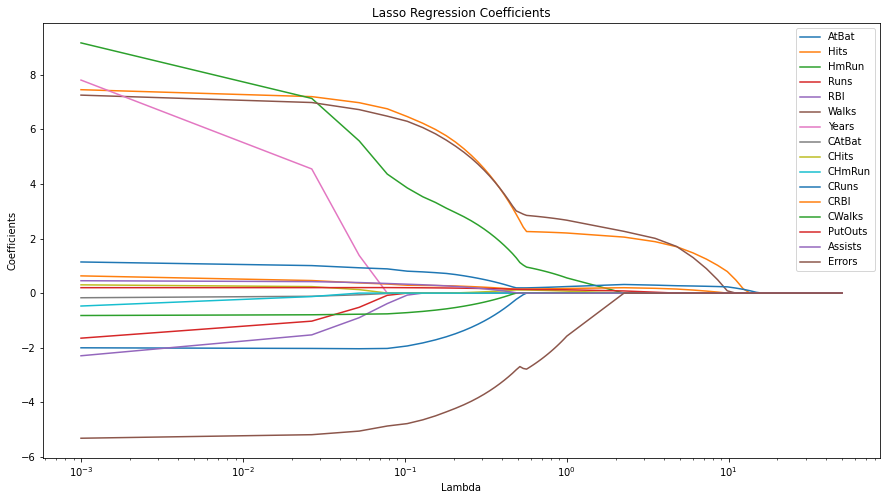

In [7]:
# plot the result
plt.figure(figsize = (15, 8))
ax = plt.gca()
ax.plot(lambdas, lasso_coeffs)
ax.set_xscale('log')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.legend(X.columns, bbox_to_anchor=(1,1))

3. Comment on which are the final three predictors that remain in the model.   
    **ANS**: The final 3 predictors: **Hits, Walks, CRuns**




4. Use cross-validation to find the optimal value of the regularization penality.

The optimal regularization penalty is 0.18 


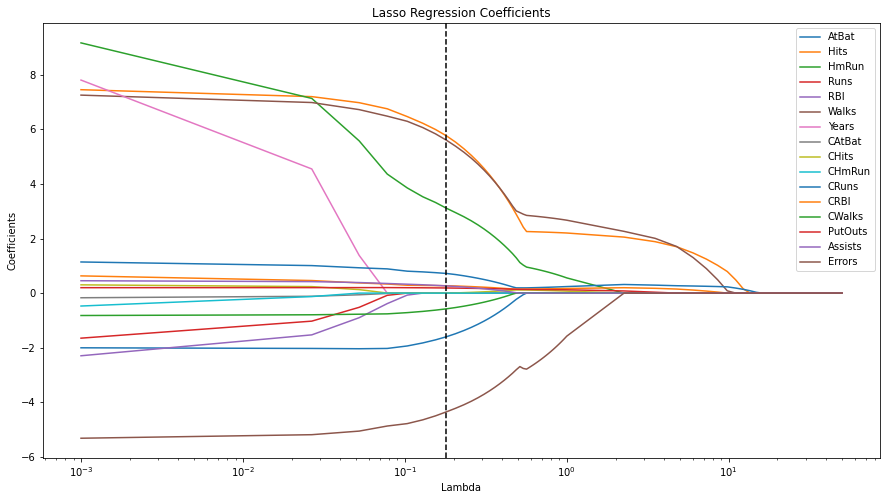

In [8]:
# Find the optimal lambda by function: lassocv
regcv= LassoCV(normalize = True, alphas = lambdas, cv = 10)
regcv.fit(X_train, y_train)
# mark the optimal lambda on graph
plt.figure(figsize = (15, 8))
ax = plt.gca()
ax.plot(lambdas, lasso_coeffs)
plt.axvline(x=regcv.alpha_, color='Black', linestyle='dashed')
ax.set_xscale('log')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
ax.legend(X.columns)

print("The optimal regularization penalty is {:.2f} ".format(regcv.alpha_))


 5. How many predictors are left in that model?

In [9]:
print("The best model containes ",np.count_nonzero(regcv.coef_),"features.")

The best model containes  10 features.


## 1.2
1. Repeat with Ridge Regression.


In [10]:
ridge_coeffs = []
for lam in lambdas:
    #setting different alpha parameters
    rid= Ridge(alpha=lam, normalize=True)
    rid.fit(X_train, y_train)
    #training lasso regression model
    ridge_coeffs.append(rid.coef_)

2. Visualize coeecient trajectories.

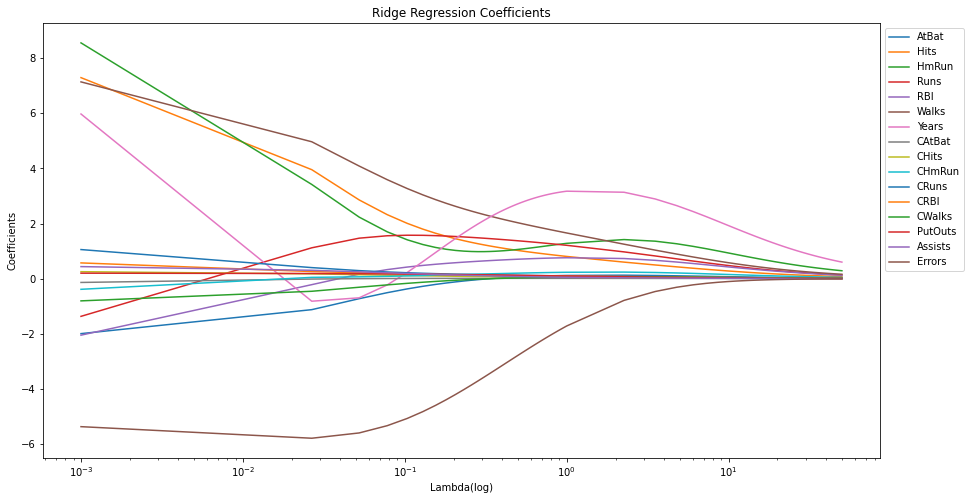

In [13]:
plt.figure(figsize = (15, 8))
ax = plt.gca()
ax.plot(lambdas, ridge_coeffs)
ax.set_xscale('log')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Lambda(log)')
plt.ylabel('Coefficients')
plt.legend(X.columns, bbox_to_anchor=(1,1))

3. Use cross- validation to find the optimal vaule of the regularization penalty.

In [14]:
ridcv = RidgeCV(normalize=True, cv=10,alphas = lambdas)
ridcv.fit(X_train, y_train)
print("The optimal regularization penalty is {:.2f} ".format(ridcv.alpha_))


The optimal regularization penalty is 0.77 


# Question2

Short Answer  

1. Explain in your own words the bias-variance tradeoff.  

    **ANS:**   
    The bias-variance tradeoff is about finding a proper model complexity by balancing the bias and variance.  
Bias shows how far is the prediction of the model from the real value, and variance estimates the variability of the model prediction. The high bias and low variance will lead to underfitting of the model; the low bias and high variance will lead to overfitting. 


2. What role does regularization play in this tradeoff. Make reference to your findings in number (1) to describe models of high/low bias and variance. 

    **ANS:**   
    The regularization is for avoiding too large coefficient and overfitting. As the plots shown above, the larger lambda, the coefficients get closer to the 0.In the other words, with the penalty term increasing, the bias will increase and the variance will decrease.
